# 1000ml Employee Performance

## Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import (log_loss,
                            accuracy_score,
                            precision_score,
                            recall_score,
                            f1_score)

plt.rcParams['figure.facecolor'] = 'w'

In [2]:
#setting dataframe as df
df = pd.read_csv("/home/bonk/Downloads/hr-data.csv")

In [3]:
display(df.head())
display(df.tail())

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
14994,14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,14998,0.37,0.52,2,158,3,0,1,0,support,low


In [4]:
print(df.shape)

(14999, 11)


A total of 15,000 IDs and rows with 11 columns

In [5]:
df.columns

Index(['id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'churn',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [6]:
df.dtypes

id                         int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
churn                      int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [7]:
df.isnull().sum()

id                       0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
churn                    0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [8]:
df.nunique()

id                       14999
satisfaction_level          92
last_evaluation             65
number_project               6
average_montly_hours       215
time_spend_company           8
Work_accident                2
churn                        2
promotion_last_5years        2
sales                       10
salary                       3
dtype: int64

In [9]:
print("Different salary types: ", df.salary.unique())
print()
print("Different work accident types: ", df.Work_accident.unique())
print()
print("Different churn types: ", df.churn.unique())
print()
print("Different Sales types: ", df.sales.unique())
print()
print("Different time_spend_company: ", df.time_spend_company.unique())
print()
print("Different number_project: ", df.number_project.unique())

Different salary types:  ['low' 'medium' 'high']

Different work accident types:  [0 1]

Different churn types:  [1 0]

Different Sales types:  ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']

Different time_spend_company:  [ 3  6  4  5  2  8 10  7]

Different number_project:  [2 5 7 6 4 3]


In [10]:
display(df.loc[df.time_spend_company == 10])
display(df.loc[df.time_spend_company == 2])

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
11078,11078,0.69,0.88,3,164,10,0,0,0,management,medium
11124,11124,0.29,0.75,6,271,10,0,0,0,sales,medium
11193,11193,0.75,0.60,4,186,10,1,0,0,marketing,low
11194,11194,0.61,0.89,3,242,10,0,0,0,sales,high
11195,11195,0.47,0.79,3,284,10,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
14205,14205,0.22,0.94,3,193,10,0,0,1,management,high
14206,14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,14208,0.85,0.54,3,185,10,0,0,1,management,high


,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
50,50,0.13,0.78,6,152,2,0,1,0,support,low
116,116,0.86,0.68,5,263,2,0,1,0,technical,medium
175,175,0.54,0.74,4,164,2,0,1,0,sales,low
376,376,0.56,0.71,4,296,2,0,1,0,IT,medium
378,378,0.31,0.56,4,238,2,0,1,0,accounting,medium
...,...,...,...,...,...,...,...,...,...,...,...
14696,14696,0.32,0.95,5,172,2,0,1,0,sales,low
14787,14787,0.48,0.78,2,198,2,0,1,0,technical,medium
14831,14831,0.80,0.75,3,268,2,0,1,0,sales,medium
14842,14842,0.34,0.67,4,141,2,0,1,0,sales,low


Satisfaction level and last evaluation seems to have a maximum value of 1 and a minimum value of 0. This may be a percetange of how satisfied they are and how satisfied they were from the last evaluation. Work accidents, churn, promotion seems to be a 1 or 0, or yes or no answer. 3 different sales type is found to be low, medium, high. I will be assuming the time_spend_company to be total of years that the employee has been working in the company. I will assuming there are 6 different projects that employees are working on labeled between 2 to 7. There are 10 different positions in the sales column.


In [11]:
cleanup_num = {'salary': {'low': 0, 'medium':1, 'high': 2}}

In [12]:
df.replace(cleanup_num, inplace=True)

In [13]:
df.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,0
1,1,0.80,0.86,5,262,6,0,1,0,sales,1
2,2,0.11,0.88,7,272,4,0,1,0,sales,1
3,3,0.72,0.87,5,223,5,0,1,0,sales,0
4,4,0.37,0.52,2,159,3,0,1,0,sales,0


## Categorizing variables

In [14]:
target = ['churn']

numerical_variables = [
    'average_montly_hours',
    'id',
    'time_spend_company',
    'number_project',
    'last_evaluation',
    'satisfaction_level',
]

categorical_variables = [
    'sales',
    'salary',
    'promotion_last_5years',
    'Work_accident'
]

## Train and Test Data

In [15]:
train_df, test_df = train_test_split(df, test_size = 0.2)

In [16]:
display(train_df.head())
display(test_df.head())

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
2427,2427,0.81,0.92,5,259,3,0,0,0,IT,0
10279,10279,0.85,0.96,2,260,3,0,0,0,support,1
2735,2735,0.66,0.86,5,185,3,0,0,0,IT,0
1144,1144,0.43,0.45,2,140,3,0,1,0,sales,0
12732,12732,0.85,0.58,3,226,2,0,1,0,support,1


,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
13150,13150,0.52,0.63,3,233,3,0,0,1,sales,1
11717,11717,0.54,0.63,4,140,3,0,0,0,sales,1
2253,2253,0.22,0.52,6,175,4,0,0,0,technical,1
5894,5894,0.60,0.95,4,164,4,0,0,0,sales,1
130,130,0.10,0.83,6,292,4,0,1,0,support,0


In [17]:
display(test_df.shape[0]/(test_df.shape[0] + train_df.shape[0]))
display(train_df.shape[0]/(test_df.shape[0] + train_df.shape[0]))

0.20001333422228149

0.7999866657777185

We have split the dataset into 20% testing data and 80% training data. 

## Statistic summary of the numerical columns

In [18]:
train_df[numerical_variables].describe()

,average_montly_hours,id,time_spend_company,number_project,last_evaluation,satisfaction_level
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,201.099842,7510.511959,3.494541,3.807151,0.716009,0.614110
std,49.890537,4333.105055,1.462124,1.230541,0.171116,0.247642
min,96.000000,1.000000,2.000000,2.000000,0.360000,0.090000
25%,156.000000,3772.500000,3.000000,3.000000,0.560000,0.440000
50%,200.000000,7522.000000,3.000000,4.000000,0.720000,0.650000
75%,245.000000,11275.000000,4.000000,5.000000,0.870000,0.820000
max,310.000000,14998.000000,10.000000,7.000000,1.000000,1.000000


From the table above, we can see that the average satisfaction level for current employees have dropped from 71% during last evaluation to 61% for this evaluation. Employees work an average of 201 hours a month. 

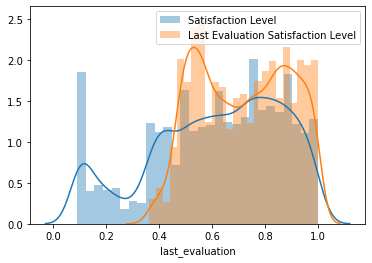

In [19]:
sns.distplot(train_df['satisfaction_level'], label = 'Satisfaction Level')
sns.distplot(train_df['last_evaluation'], label = 'Last Evaluation Satisfaction Level')
plt.legend()
plt.show()

From the graph above, it is clearly seen employees were more satisfied last evaluation compared to this one. It is assumed that the satisfaction level corresponds to the employee's individual satisfaction level and not the company's satisfaction level towards the employee.

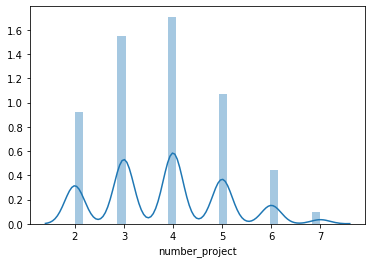

In [20]:
sns.distplot(train_df['number_project'], label = 'Project Number')

It seems that there are more people working on project 4 and 3 compared to the rest. Maybe the project they are working on that is causing them to leave.

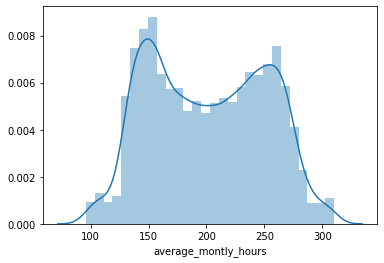

In [21]:
sns.distplot(train_df['average_montly_hours'], label = 'Average Monthly Hours')

Average monthly hours plotted. There seems to be a higher volume of people working on the lower and higher ends than the average monthly hours. 

In [22]:
train_df['churn'].value_counts(normalize = True)

0    0.76098
1    0.23902
Name: churn, dtype: float64

Here we notice there is an imbalance between churning and not churning. 0 being false and 1 being true

## Model 1

In [23]:
X1 = train_df[numerical_variables]
y1 = train_df['churn']

In [24]:
#train validation data split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,
                                                     y1,
                                                     test_size = 0.2,
                                                     random_state=42)

In [25]:
#scale model
scaler1=StandardScaler()

#fit scaler
scaler1.fit(X1_train)
scaler1.fit(X1_test)

#transform the data
X1_train_scale = scaler1.transform(X1_train)
X1_test_scale = scaler1.transform(X1_test)

In [26]:
solvers = ['lbfgs', 'newton-cg','sag','saga']

In [27]:
for solver in solvers:
    
    #logistic regression
    clf1 = LogisticRegression(penalty = 'none', 
                              solver = solver, 
                              class_weight = 'balanced',
                              max_iter = 100000,
                              verbose = 1)

    #fit model
    clf1.fit(X1_train, y1_train)
    
    y1_train_pred = clf1.predict(X1_train_scale)
    y1_train_pred_proba = clf1.predict_proba(X1_train_scale)

    y1_test_pred = clf1.predict(X1_test_scale)
    y1_test_pred_proba = clf1.predict_proba(X1_test_scale)
    
    #log loss
    print(f'Train Log Loss for {solver} : {log_loss(y1_train, y1_train_pred_proba)}')
    print(f'Validation Log Loss for {solver} : {log_loss(y1_test, y1_test_pred_proba)}')
    print()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train Log Loss for lbfgs : 1.4460937530588682
Validation Log Loss for lbfgs : 1.4827796177361012



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train Log Loss for newton-cg : 1.3569245325646722
Validation Log Loss for newton-cg : 1.400382126933794

convergence after 7536 epochs took 12 seconds
Train Log Loss for sag : 0.6738937001398198
Validation Log Loss for sag : 0.6756635758622757



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8518 epochs took 17 seconds
Train Log Loss for saga : 0.6813461137583855
Validation Log Loss for saga : 0.6824570327605344



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.3s finished


Out of all the solvers, `sag` has the best log loss value. We will use sag for future analysis. 

In [28]:
#Using only sag as the solver
clf1 = LogisticRegression(penalty = 'none', 
                              solver = 'sag', 
                              class_weight = 'balanced',
                              max_iter = 100000,
                              verbose = 1)

#fit model
clf1.fit(X1_train, y1_train)
   
y1_train_pred = clf1.predict(X1_train_scale)
y1_train_pred_proba = clf1.predict_proba(X1_train_scale)

y1_test_pred = clf1.predict(X1_test_scale)
y1_test_pred_proba = clf1.predict_proba(X1_test_scale)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 7536 epochs took 11 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.9s finished


In [29]:
print(classification_report(y1_test, y1_test_pred,target_names=['Not-Churn', 'Churn']))

              precision    recall  f1-score   support

   Not-Churn       0.97      0.71      0.82      1841
       Churn       0.49      0.94      0.64       559

    accuracy                           0.76      2400
   macro avg       0.73      0.82      0.73      2400
weighted avg       0.86      0.76      0.78      2400



In [30]:
metric_list = ['accuracy',
              'precision',
              'recall',
              'f1']

metric_function_list = [accuracy_score,
                       precision_score,
                       recall_score,
                       f1_score]


In [32]:
for metric, metric_function in zip(metric_list, metric_function_list):
    train_metric = metric_function(y1_train, y1_train_pred)
    val_metric = metric_function(y1_test, y1_test_pred)
    
    print(f'Train {metric} score: {train_metric:.3f}')
    print(f'Validation {metric} score: {val_metric:.3f}')
    print()

Train accuracy score: 0.772
Validation accuracy score: 0.759

Train precision score: 0.514
Validation precision score: 0.491

Train recall score: 0.930
Validation recall score: 0.936

Train f1 score: 0.662
Validation f1 score: 0.644



This model has a high recall score and suffers a low precision score. There might be a lot of false positives of people churning. The harmonic score f1 seems to be decent enough but we will continue to use other models to see if we can improve it. 


## Model 2 with L2

In [33]:
# X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y1, test_size=0.25, random_state =42)
scaler2=StandardScaler()

scaler2.fit(X1_train)
scaler2.fit(X1_test)
X2_train_scale = scaler2.transform(X1_train)
X2_test_scale = scaler2.transform(X1_test)

In [34]:
#Setting model
clf2 = LogisticRegression(penalty = 'l2', 
                              solver = 'sag', 
                              class_weight = 'balanced',
                              max_iter = 1000,
                              random_state=42,
                              verbose = 1)

clf2.fit(X2_train_scale, y1_train)

y2_train_pred = clf2.predict(X2_train_scale)
y2_train_pred_proba = clf2.predict_proba(X2_train_scale)

y2_test_pred = clf2.predict(X2_test_scale)
y2_test_pred_proba = clf2.predict_proba(X2_test_scale)

convergence after 33 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [38]:
print(classification_report(y1_test, y2_test_pred,target_names=['Not-Churn', 'Churn']))

              precision    recall  f1-score   support

   Not-Churn       0.92      0.74      0.82      1841
       Churn       0.48      0.79      0.59       559

    accuracy                           0.75      2400
   macro avg       0.70      0.76      0.71      2400
weighted avg       0.82      0.75      0.77      2400



In [41]:
for metric, metric_function in zip(metric_list, metric_function_list):
    train_metric = metric_function(y1_train, y2_train_pred)
    val_metric = metric_function(y1_test, y2_test_pred)
    
    print(f'Train {metric} score: {train_metric:.3f}')
    print(f'Validation {metric} score: {val_metric:.3f}')
    print()

Train accuracy score: 0.749
Validation accuracy score: 0.748

Train precision score: 0.487
Validation precision score: 0.476

Train recall score: 0.780
Validation recall score: 0.789

Train f1 score: 0.599
Validation f1 score: 0.594



Sag only allowed penalty of none or l2 and l2 seems to be better than none. We will continue to look at other solvers to see if the scores are any better than what we have. 

## Model 3 

In [42]:
# X3_train, X3_test, y3_train, y3_test = train_test_split(X1, y1, test_size=0.25, random_state =42)
scaler3=StandardScaler()

scaler3.fit(X1_train)
scaler3.fit(X1_test)
X3_train_scale = scaler3.transform(X1_train)
X3_test_scale = scaler3.transform(X1_test)
#replace above with X2_train_scale

Saga solver seems to be close to sag so we will look into solver saga.

In [47]:
train_recall_score_list =[]
test_recall_score_list=[]
train_f1_score_list=[]
test_f1_score_list=[]

#Setting model
for C in [1/np.power(10,int(n)) for n in range (0,7)]:
    clf3 = LogisticRegression(penalty = 'l1', 
                              solver = 'saga', 
                              class_weight = 'balanced',
                              max_iter = 1000,
                              random_state=42,
                              l1_ratio = 0.1,
                              C=C,
                              verbose = 1)

    clf3.fit(X3_train_scale, y1_train)

    
    y3_train_pred = clf3.predict(X3_train_scale)
    y3_train_pred_proba = clf3.predict_proba(X3_train_scale)
    y3_test_pred = clf3.predict(X3_test_scale)
    y3_test_pred_proba = clf3.predict_proba(X3_test_scale)
    
    #appending to the list
    train_recall_score_list.append(recall_score(y1_train, y3_train_pred))
    test_recall_score_list.append(recall_score(y1_test, y3_test_pred))
    train_f1_score_list.append(f1_score(y1_train, y3_train_pred))
    test_f1_score_list.append(f1_score(y1_test, y3_test_pred))

/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend Se

convergence after 18 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 11 epochs took 0 seconds
convergence after 3 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(pen

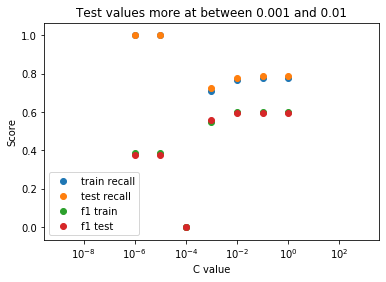

In [48]:
plt.xscale('log')
plt.scatter([1/np.power(10,int(n)) for n in range(0,7)],
            train_recall_score_list,
            label='train recall')
plt.scatter([1/np.power(10, int(n)) for n in range(0,7)],
            test_recall_score_list,
            label='test recall')

plt.scatter([1/np.power(10,int(n)) for n in range(0,7)],
            train_f1_score_list,
            label='f1 train')
plt.scatter([1/np.power(10, int(n)) for n in range(0,7)],
            test_f1_score_list,
            label='f1 test')


plt.title('Test values more at between 0.001 and 0.01')
plt.xlabel('C value')
plt.ylabel('Score')
plt.legend()
plt.show()

In [49]:
display({key: val for key, val in zip ([1/np.power(10, int(n)) for n in range (0,7)], train_recall_score_list)})
display({key: val for key, val in zip ([1/np.power(10, int(n)) for n in range (0,7)], test_recall_score_list)})
display({key: val for key, val in zip ([1/np.power(10, int(n)) for n in range (0,7)], train_f1_score_list)})
display({key: val for key, val in zip ([1/np.power(10, int(n)) for n in range (0,7)], test_f1_score_list)})

{1.0: 0.7804244261585102,
 0.1: 0.7799913382416631,
 0.01: 0.7687310524036379,
 0.001: 0.711130359462971,
 0.0001: 0.0,
 1e-05: 1.0,
 1e-06: 1.0}

{1.0: 0.7889087656529516,
 0.1: 0.7889087656529516,
 0.01: 0.776386404293381,
 0.001: 0.7280858676207513,
 0.0001: 0.0,
 1e-05: 1.0,
 1e-06: 1.0}

{1.0: 0.5992683737944796,
 0.1: 0.5992347363167525,
 0.01: 0.5991561181434599,
 0.001: 0.5493476078956172,
 0.0001: 0.0,
 1e-05: 0.38780651662747734,
 1e-06: 0.38780651662747734}

{1.0: 0.5935397039030955,
 0.1: 0.593939393939394,
 0.01: 0.5949280328992461,
 0.001: 0.559450171821306,
 0.0001: 0.0,
 1e-05: 0.37783034809057114,
 1e-06: 0.37783034809057114}

The best recall score and f1 score is when C = 1. 

In [50]:
clf3 = LogisticRegression(penalty = 'l1', 
                              solver = 'saga', 
                              class_weight = 'balanced',
                              max_iter = 1000,
                              random_state=42,
                              l1_ratio = 0.1,
                              C=1,
                              verbose = 1)

clf3.fit(X3_train_scale, y1_train)

    
y3_train_pred = clf3.predict(X3_train_scale)
y3_train_pred_proba = clf3.predict_proba(X3_train_scale)
y3_test_pred = clf3.predict(X3_test_scale)
y3_test_pred_proba = clf3.predict_proba(X3_test_scale)

convergence after 18 epochs took 0 seconds


/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [51]:
print(classification_report(y1_test, y3_test_pred,target_names=['Not-Churn', 'Churn']))

              precision    recall  f1-score   support

   Not-Churn       0.92      0.74      0.82      1841
       Churn       0.48      0.79      0.59       559

    accuracy                           0.75      2400
   macro avg       0.70      0.76      0.71      2400
weighted avg       0.82      0.75      0.77      2400



In [52]:
for metric, metric_function in zip(metric_list, metric_function_list):
    train_metric = metric_function(y1_train, y3_train_pred)
    val_metric = metric_function(y1_test, y3_test_pred)
    
    print(f'Train {metric} score: {train_metric:.3f}')
    print(f'Validation {metric} score: {val_metric:.3f}')
    print()

Train accuracy score: 0.749
Validation accuracy score: 0.748

Train precision score: 0.486
Validation precision score: 0.476

Train recall score: 0.780
Validation recall score: 0.789

Train f1 score: 0.599
Validation f1 score: 0.594



In [53]:
pd.Series(clf3.predict(X1_train)).value_counts()

0    9450
1     149
dtype: int64

In [54]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[1/np.power(10,int(n)) for n in range (0,7)]}

clf4 = GridSearchCV(LogisticRegression(penalty = 'l1', 
                              solver = 'saga', 
                              class_weight = 'balanced',
                              max_iter = 100000,
                              l1_ratio=0.1,
                              random_state=42,
                              verbose = 1), parameters)
clf4.fit(X1_train, y1_train)

/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8767 epochs took 17 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.0s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8767 epochs took 17 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.6s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8751 epochs took 17 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.6s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8756 epochs took 16 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.6s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8775 epochs took 17 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.7s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8765 epochs took 17 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.6s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8765 epochs took 16 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.6s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8748 epochs took 17 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.5s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8753 epochs took 16 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.5s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8773 epochs took 17 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.6s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8742 epochs took 16 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.5s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8744 epochs took 17 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.5s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8724 epochs took 16 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.5s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8730 epochs took 17 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.5s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8752 epochs took 16 seconds
convergence after 60 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.6s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 137 epochs took 0 seconds
convergence after 40 epochs took 0 seconds
convergence after 39 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(pen

convergence after 57 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 27 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(pen

convergence after 26 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 25 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(pen

convergence after 26 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 23 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(pen

convergence after 26 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
convergence after 33 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(pen

convergence after 27 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=0.1,
                                          max_iter=100000, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=42, solver='saga',
                                          tol=0.0001, verbose=1,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [55]:
#clf4.predict

y4_test_pred = clf4.predict(X1_test)
print(classification_report(y1_test, y4_test_pred,target_names=['Not-Churn', 'Churn']))

              precision    recall  f1-score   support

   Not-Churn       0.77      1.00      0.87      1841
       Churn       0.00      0.00      0.00       559

    accuracy                           0.77      2400
   macro avg       0.38      0.50      0.43      2400
weighted avg       0.59      0.77      0.67      2400



/home/bonk/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From all the models, model 1 seems to give the best F1 score. We will use that model. 

## Using Model 1

In [56]:
{key: val for key, val in zip(numerical_variables, clf1.coef_.round(4)[0])}

{'average_montly_hours': 0.001,
 'id': -0.0001,
 'time_spend_company': 0.1165,
 'number_project': -0.0336,
 'last_evaluation': -0.0066,
 'satisfaction_level': -0.0724}

Time spend in the company seems to have the highest positive correlation towards people churning. One reasoning may be the employees are not enjoying their time working for the company. We could monitor or survey what the employees like and not like about working for the company. A solution to implement would be to host employee appreciation events or achievement bonuses towards employees after working for a period of time.

In [57]:
df.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,0
1,1,0.80,0.86,5,262,6,0,1,0,sales,1
2,2,0.11,0.88,7,272,4,0,1,0,sales,1
3,3,0.72,0.87,5,223,5,0,1,0,sales,0
4,4,0.37,0.52,2,159,3,0,1,0,sales,0


We will assume high performers are the ones that have no work accidents and have had a promotion in the last 5 years.

In [58]:
highperformers_df = df[(df['Work_accident']==0) & (df['promotion_last_5years']==1)].reset_index()
highperformers_df.head()

,index,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
0,82,82,0.79,0.59,4,139,3,0,1,1,management,0
1,171,171,0.41,0.46,2,160,3,0,1,1,sales,0
2,287,287,0.11,0.79,6,292,4,0,1,1,technical,0
3,584,584,0.41,0.56,2,154,3,0,1,1,support,1
4,751,751,0.46,0.45,2,138,3,0,1,1,IT,0


In [59]:
trainhp_df, testhp_df = train_test_split(highperformers_df, test_size = 0.2)

In [60]:
#train validation data split
X1hp_train, X1hp_test, y1hp_train, y1hp_test = train_test_split(X1,
                                                     y1,
                                                     test_size = 0.2,
                                                     random_state=42)

In [61]:
#scale model
scalerhp=StandardScaler()

#fit scaler
scalerhp.fit(X1hp_train)
scalerhp.fit(X1hp_test)

#transform the data
X1hp_train_scale = scalerhp.transform(X1hp_train)
X1hp_test_scale = scalerhp.transform(X1hp_test)

In [62]:
#Using only sag as the solver
clf1hp = LogisticRegression(penalty = 'none', 
                              solver = 'sag', 
                              class_weight = 'balanced',
                              max_iter = 100000,
                              verbose = 1)

#fit model
clf1hp.fit(X1hp_train, y1hp_train)
   
y1hp_train_pred = clf1hp.predict(X1hp_train_scale)
y1hp_train_pred_proba = clf1hp.predict_proba(X1hp_train_scale)

y1hp_test_pred = clf1hp.predict(X1hp_test_scale)
y1hp_test_pred_proba = clf1hp.predict_proba(X1hp_test_scale)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 7536 epochs took 12 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.2s finished


In [63]:
print(classification_report(y1hp_test, y1hp_test_pred,target_names=['Not-Churn', 'Churn']))

              precision    recall  f1-score   support

   Not-Churn       0.97      0.71      0.82      1841
       Churn       0.49      0.94      0.64       559

    accuracy                           0.76      2400
   macro avg       0.73      0.82      0.73      2400
weighted avg       0.86      0.76      0.78      2400



In [67]:
import itertools 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
      # """     
      # This function prints and plots the confusion matrix.    
      # Normalization can be applied by setting `normalize=True`. 
      # """
      if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
        print("Normalized confusion matrix")
      else:
        print('Confusion matrix, without normalization') 
      print(cm) 
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title) 
      plt.colorbar() 
      tick_marks = np.arange(len(classes)) 
      plt.xticks(tick_marks, classes, rotation=45) 
      plt.yticks(tick_marks, classes) 
      fmt = '.2f' if normalize else 'd' 
      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): 
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center", 
                  color="white" if cm[i, j] > thresh else "black")
      plt.ylabel('True label')
      plt.xlabel('Predicted label')
      plt.tight_layout()

Confusion matrix, without normalization
[[5260 2030]
 [ 161 2148]]


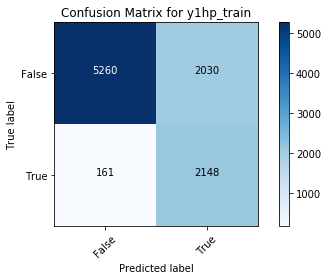

In [68]:
confusion_matrix(y1hp_train, y1hp_train_pred)
plot_confusion_matrix(confusion_matrix(y1hp_train, y1hp_train_pred),
                      [False, True],
                      title = "Confusion Matrix for y1hp_train")

Within the high performers, there are a big number of true positives that are churning. 